In [5]:
from keras.layers import Dense, Input
from keras.models import Model
import load_data

In [6]:
encodingDim = 32
inputImg = Input(shape=(4096,))
encodedIP = Dense(encodingDim,activation ='relu')(inputImg)
decodedIP = Dense(4096,activation='sigmoid')(encodedIP)

In [7]:
path1 = 'animeface-character-dataset/thumb'
path2 = 'animeface-character-dataset/thumb1'
path3 = 'animeface-character-dataset/thumb2'
path4 = 'animeface-character-dataset/thumb3'

In [8]:
data1 = load_data.load(path1)
data2 = load_data.load(path2)
data3 = load_data.load(path3)
data4 = load_data.load(path4)

In [10]:
import numpy as np
data = np.array(data1 + data2 + data3 + data4)
data = data / 255
data = data.reshape(-1, 4096)

In [11]:
autoencoder = Model(input = inputImg,output = decodedIP)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [12]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

In [17]:
autoencoder.fit(data,data,epochs=12,verbose=1,batch_size=256,shuffle=True,
                validation_data=(data,data))

Train on 14490 samples, validate on 14490 samples
Epoch 1/12
14490/14490 [==============================] - 8s 532us/step - loss: 0.6298 - val_loss: 0.6290
Epoch 2/12
14490/14490 [==============================] - 8s 538us/step - loss: 0.6281 - val_loss: 0.6272
Epoch 3/12
14490/14490 [==============================] - 7s 485us/step - loss: 0.6262 - val_loss: 0.6252
Epoch 4/12
14490/14490 [==============================] - 7s 516us/step - loss: 0.6243 - val_loss: 0.6232
Epoch 5/12
14490/14490 [==============================] - 8s 520us/step - loss: 0.6223 - val_loss: 0.6213
Epoch 6/12
14490/14490 [==============================] - 7s 504us/step - loss: 0.6203 - val_loss: 0.6192
Epoch 7/12
14490/14490 [==============================] - 7s 490us/step - loss: 0.6182 - val_loss: 0.6171
Epoch 8/12
14490/14490 [==============================] - 7s 488us/step - loss: 0.6161 - val_loss: 0.6150
Epoch 9/12
14490/14490 [==============================] - 7s 486us/step - loss: 0.6140 - val_loss: 0.6

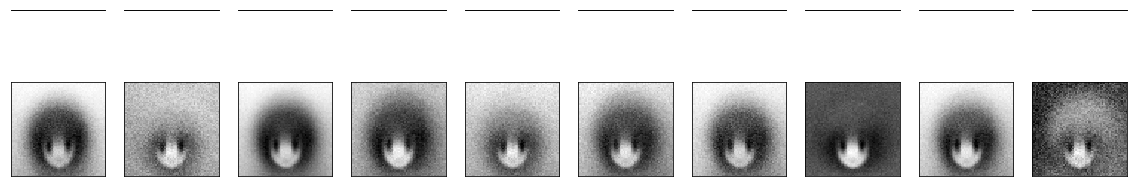

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #displaying original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(data[i:i+1])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #displaying predictions
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(autoencoder.predict(data[i:i+1]).reshape(64,64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()